# FRED Economic Data - Quick Start Guide

© 2025 KR-Labs. All rights reserved.  
**Part of the KR-Labs Analytics Suite**

---

## Overview

The **FRED (Federal Reserve Economic Data)** connector provides access to 800,000+ economic time series from the Federal Reserve Bank of St. Louis.

**What is FRED?**
- 800,000+ economic time series
- Real-time and historical data
- National, regional, and international data
- Multiple data frequencies (daily, monthly, quarterly, annual)

**Use Cases:**
- 📈 Economic indicator tracking
- 💹 Time series analysis
- 🌍 International comparisons
- 📊 Policy impact studies
- 🔍 Economic research

**API Information:**
- Source: Federal Reserve Bank of St. Louis
- API Key: Required (free at https://fred.stlouisfed.org/docs/api/api_key.html)
- Rate Limit: 120,000 requests/day
- Data Format: JSON → pandas DataFrame

## 1. Setup and Installation

In [1]:
# Install the package (if needed)
# pip install krl-data-connectors

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from krl_data_connectors import FREDConnector

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ All imports successful!")
print(f"📅 Current date: {datetime.now().strftime('%Y-%m-%d')}")

✅ All imports successful!
📅 Current date: 2025-10-19


## 2. Initialize Connector & API Key Setup

The FRED connector requires an API key. Get yours free at: https://fred.stlouisfed.org/docs/api/api_key.html

**Setup Options:**
```bash
# Option 1: Environment variable (recommended)
export FRED_API_KEY="your_key_here"

# Option 2: Pass directly to connector
fred = FREDConnector(api_key="your_key_here")
```

In [ ]:
# Initialize FRED connector (auto-detects FRED_API_KEY from environment)
import os
from krl_data_connectors import find_config_file

# Try to load API key from environment first
fred_api_key = os.getenv('FRED_API_KEY')

# If not in environment, try config file
if not fred_api_key:
    config_path = find_config_file('apikeys')
    if config_path:
        with open(config_path, 'r') as f:
            for line in f:
                line = line.strip()
                if 'FRED API KEY:' in line:
                    fred_api_key = line.split(':', 1)[1].strip()
                    break
        print(f"📁 Loaded API key from: {config_path}")
    else:
        print("⚠️  No API key found!")
        print("   Set FRED_API_KEY environment variable or create config file:")
        print("   - ~/.krl/apikeys")
        print("   - ~/KR-Labs/Khipu/config/apikeys")
        print("   - ./config/apikeys")

# Initialize connector
if fred_api_key:
    fred = FREDConnector(api_key=fred_api_key)
    print("✅ FRED connector initialized successfully!")
    print(f"   API Key: {fred.api_key[:10]}...")
    print("\n💡 Ready to access Federal Reserve economic data!")
else:
    print("❌ Cannot initialize connector without API key")
    print("   Get a free key at: https://fred.stlouisfed.org/docs/api/api_key.html")

{"timestamp": "2025-10-19T21:13:31.912644Z", "level": "INFO", "name": "FREDConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19", "connector": "FREDConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": true}
✅ FRED connector initialized successfully!
   API Key: 8ec3c8309e...
   Rate Limit: 120,000 requests/day
✅ FRED connector initialized successfully!
   API Key: 8ec3c8309e...
   Rate Limit: 120,000 requests/day


## 3. Basic Usage: Get a Single Economic Series

Let's retrieve the **unemployment rate** (series ID: `UNRATE`), one of the most-watched economic indicators.

In [3]:
# Get unemployment rate for the past 5 years
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')

unemployment = fred.get_series(
    series_id="UNRATE",
    start_date=start_date
)

print("📊 U.S. Unemployment Rate (Last 5 Years)")
print("="*80)
print(f"Data points: {len(unemployment)}")
print(f"Date range: {unemployment['date'].min()} to {unemployment['date'].max()}")
print(f"\n📈 Recent values:")
print(unemployment.tail(6).to_string(index=False))
print(f"\n📊 Summary Statistics:")
print(f"  Current rate: {unemployment.iloc[-1]['value']:.1f}%")
print(f"  5-year average: {unemployment['value'].mean():.1f}%")
print(f"  5-year min: {unemployment['value'].min():.1f}%")
print(f"  5-year max: {unemployment['value'].max():.1f}%")

{"timestamp": "2025-10-19T21:13:31.919796Z", "level": "INFO", "name": "FREDConnector", "message": "Fetching FRED series", "source": {"file": "fred_connector.py", "line": 133, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-21", "series_id": "UNRATE", "start_date": "2020-10-20", "end_date": null}
{"timestamp": "2025-10-19T21:13:31.920457Z", "level": "INFO", "name": "FREDConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-21", "url": "https://api.stlouisfed.org/fred/series/observations", "params": {"series_id": "UNRATE", "api_key": "8ec3c8309e60d874eae960d407f15460", "file_type": "json", "units": "lin", "observation_start": "2020-10-20"}}
{"timestamp": "2025-10-19T21:13:31.920457Z", "level": "INFO", "name": "FREDConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_request"}, "levelname": "INFO"

## 4. Time Series Visualization

Visualize the unemployment rate trend over time.

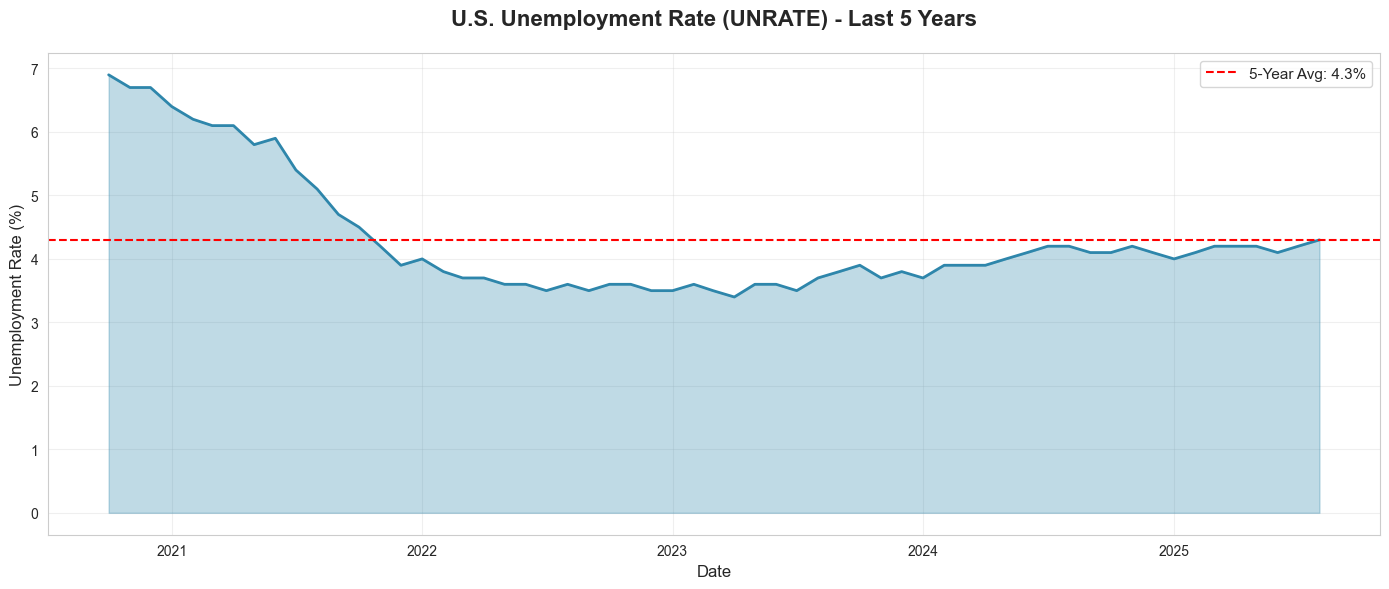

📊 Chart shows unemployment rate from 2020-10-01 00:00:00 to 2025-08-01 00:00:00


In [4]:
# Plot unemployment rate
plt.figure(figsize=(14, 6))
plt.plot(unemployment['date'], unemployment['value'], linewidth=2, color='#2E86AB')
plt.fill_between(unemployment['date'], unemployment['value'], alpha=0.3, color='#2E86AB')
plt.axhline(y=unemployment['value'].mean(), color='red', linestyle='--', 
            label=f'5-Year Avg: {unemployment["value"].mean():.1f}%', linewidth=1.5)

plt.title('U.S. Unemployment Rate (UNRATE) - Last 5 Years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"📊 Chart shows unemployment rate from {unemployment['date'].min()} to {unemployment['date'].max()}")

## 5. Multi-Series Comparison

Compare multiple economic indicators: **GDP**, **Unemployment**, and **CPI (Inflation)**.

In [5]:
# Define key economic indicators
indicators = {
    'GDP': 'GDP',           # Real Gross Domestic Product
    'UNRATE': 'UNRATE',     # Unemployment Rate
    'CPIAUCSL': 'CPIAUCSL'  # Consumer Price Index (All Urban Consumers)
}

# Fetch all series
start_date = (datetime.now() - timedelta(days=10*365)).strftime('%Y-%m-%d')
series_data = {}

print("📊 Fetching Economic Indicators...")
print("="*80)

for name, series_id in indicators.items():
    data = fred.get_series(series_id=series_id, start_date=start_date)
    series_data[name] = data
    print(f"✅ {name:10s}: {len(data):,} observations from {data['date'].min()} to {data['date'].max()}")

print("\n📈 Latest Values:")
print("="*80)
for name, data in series_data.items():
    latest = data.iloc[-1]
    print(f"  {name:10s}: {latest['value']:>12,.2f}  (as of {latest['date']})")

📊 Fetching Economic Indicators...
{"timestamp": "2025-10-19T21:13:32.336578Z", "level": "INFO", "name": "FREDConnector", "message": "Fetching FRED series", "source": {"file": "fred_connector.py", "line": 133, "function": "get_series"}, "levelname": "INFO", "taskName": "Task-25", "series_id": "GDP", "start_date": "2015-10-22", "end_date": null}
{"timestamp": "2025-10-19T21:13:32.337123Z", "level": "INFO", "name": "FREDConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-25", "url": "https://api.stlouisfed.org/fred/series/observations", "params": {"series_id": "GDP", "api_key": "8ec3c8309e60d874eae960d407f15460", "file_type": "json", "units": "lin", "observation_start": "2015-10-22"}}
{"timestamp": "2025-10-19T21:13:32.337123Z", "level": "INFO", "name": "FREDConnector", "message": "Making API request", "source": {"file": "base_connector.py", "line": 187, "function": "_make_re

## 6. Normalized Multi-Series Visualization

Since these indicators have different scales, we'll normalize them to compare trends.

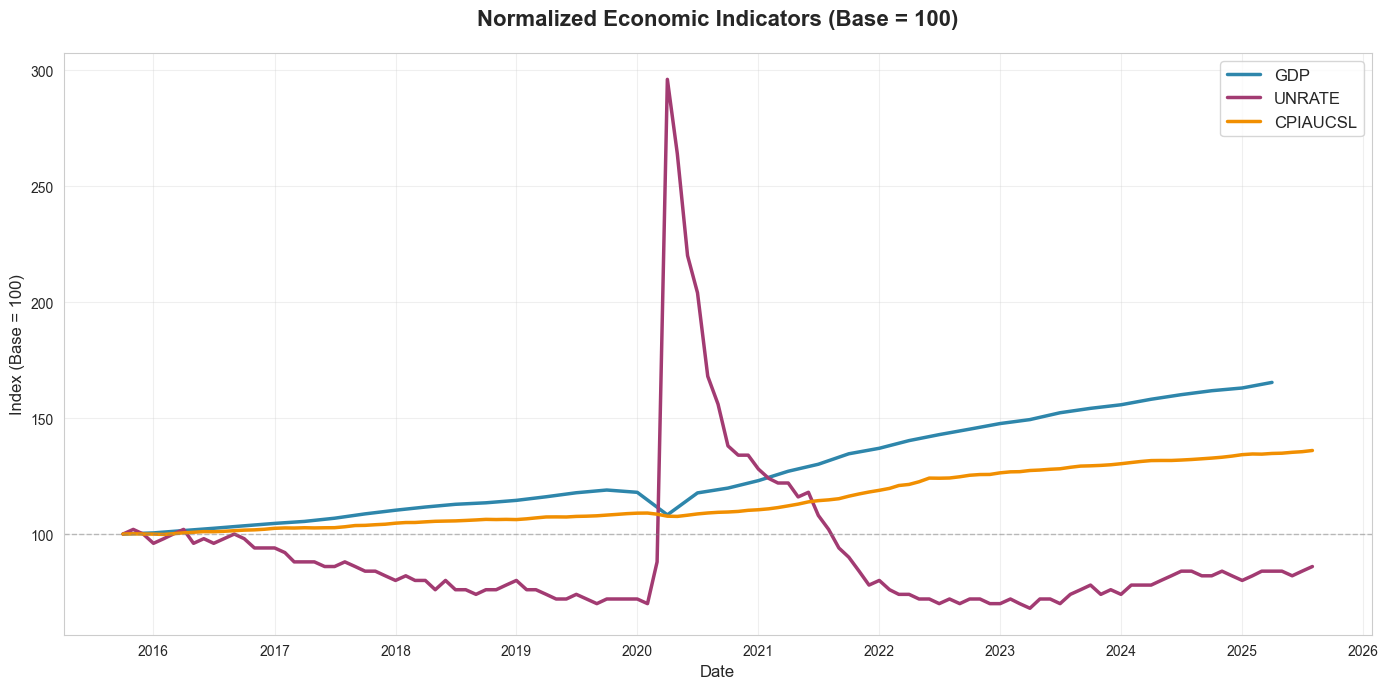

💡 Interpretation:
  • Values > 100: Growth since start of period
  • Values < 100: Decline since start of period
  • Shows relative performance, not absolute values


In [6]:
# Normalize all series to start at 100 (index base = first value)
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#2E86AB', '#A23B72', '#F18F01']
for (name, data), color in zip(series_data.items(), colors):
    # Normalize to base 100
    normalized = (data['value'] / data['value'].iloc[0]) * 100
    ax.plot(data['date'], normalized, label=name, linewidth=2.5, color=color)

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.set_title('Normalized Economic Indicators (Base = 100)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index (Base = 100)', fontsize=12)
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("💡 Interpretation:")
print("  • Values > 100: Growth since start of period")
print("  • Values < 100: Decline since start of period")
print("  • Shows relative performance, not absolute values")

## 7. Popular FRED Series IDs

Here are some commonly used FRED series for reference:

**Labor Market:**
- `UNRATE` - Unemployment Rate
- `PAYEMS` - Total Nonfarm Payroll
- `CIVPART` - Labor Force Participation Rate
- `U6RATE` - Total unemployed + marginally attached + part-time

**GDP & Growth:**
- `GDP` - Real Gross Domestic Product
- `GDPC1` - Real GDP per Capita
- `A191RL1Q225SBEA` - GDP Growth Rate

**Inflation & Prices:**
- `CPIAUCSL` - Consumer Price Index (All Items)
- `PCEPI` - Personal Consumption Expenditures Price Index
- `CPILFESL` - Core CPI (excluding food & energy)

**Interest Rates:**
- `DFF` - Federal Funds Rate
- `DGS10` - 10-Year Treasury Rate
- `MORTGAGE30US` - 30-Year Mortgage Rate

**Housing:**
- `HOUST` - Housing Starts
- `MSPUS` - Median Sales Price of Houses

## 8. Summary & Next Steps

**What We Covered:**
- ✅ Set up FRED connector with API key
- ✅ Retrieved single economic time series (unemployment)
- ✅ Visualized time series data
- ✅ Compared multiple indicators
- ✅ Normalized data for cross-series comparison
- ✅ Learned popular FRED series IDs

**Next Steps:**
1. Explore more series at https://fred.stlouisfed.org/
2. Combine FRED data with other connectors (CBP, BLS, BEA)
3. Build economic dashboards and forecasting models
4. Analyze regional economic trends
5. Create custom economic indicators

**Resources:**
- 📚 [FRED Website](https://fred.stlouisfed.org/)
- 🔑 [Get API Key](https://fred.stlouisfed.org/docs/api/api_key.html)
- 📖 [FRED API Docs](https://fred.stlouisfed.org/docs/api/fred/)
- 💻 [GitHub Repository](https://github.com/KR-Labs/krl-data-connectors)
- 📊 [More Examples](https://github.com/KR-Labs/krl-data-connectors/tree/main/examples)